<a href="https://colab.research.google.com/github/LEEINSEO-0118/Logo_Detection/blob/main/Logo_Detect_YOLOv8_roboflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [1]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 699.7/699.7 kB 6.2 MB/s eta 0:00:00


In [ ]:
import os
import fnmatch
import zipfile

from ultralytics import YOLO
import torch

import cv2

import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# SEED

In [4]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

seed_everything(2024) # Seed 고정

# Download Zip file

In [ ]:
# wget -O 옵션으로 Roboflow Project의 데이터 다운로드
f = open('/content/drive/MyDrive/ai부트캠프/Final_Project/Logo_Detection/url.txt', 'r')
zip_file_url = f.read()
f.close()
!wget -O Logo.zip $zip_file_url

In [6]:
# .zip으로 저장한 다음 압축을 풀면 이미지와 정답 데이터가 있는 train, valid, test 디렉토리를 확인 가능
with zipfile.ZipFile('/content/Logo.zip') as zip_ref:
    zip_ref.extractall('/content/Logo')

In [7]:
# 파일 경로 확인
!cat /content/Logo/data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 1
names: ['Logos']

roboflow:
  workspace: toad-lv4t5
  project: logo-detection-2-fupls
  version: 2
  license: MIT
  url: https://universe.roboflow.com/toad-lv4t5/logo-detection-2-fupls/dataset/2

# Load Model

In [10]:
model = YOLO('yolov8n.pt')  # load a pretrained YOLOv8n detection model
print(type(model.names), len(model.names))
print(model.names)

<class 'dict'> 80
{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell p

In [11]:
model.train(data = '/content/Logo/data.yaml', epochs = 10, patience = 30, batch = 20, imgsz = 640)

Ultralytics YOLOv8.1.2 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Logo/data.yaml, epochs=10, time=None, patience=30, batch=20, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxe

train: Scanning /content/Logo/train/labels.cache... 770 images, 1 backgrounds, 0 corrupt: 100%|██████████| 770/770 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/Logo/valid/labels.cache... 192 images, 2 backgrounds, 0 corrupt: 100%|██████████| 192/192 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00046875), 63 bias(decay=0.0)
10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10       5.1G      1.933      3.158      1.553         15        640: 100%|██████████| 39/39 [00:08<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.35it/s]


                   all        192        365    0.00752      0.742      0.235      0.105

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10       5.1G      1.698      2.094        1.4         24        640: 100%|██████████| 39/39 [00:06<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.44it/s]


                   all        192        365      0.306      0.268      0.234      0.107

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      5.11G      1.684      1.858      1.388         26        640: 100%|██████████| 39/39 [00:06<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.91it/s]


                   all        192        365      0.129      0.162     0.0712     0.0321

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      5.13G      1.664      1.643      1.372         24        640: 100%|██████████| 39/39 [00:06<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.82it/s]


                   all        192        365      0.596      0.679      0.607      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      5.11G      1.671      1.543      1.395         16        640: 100%|██████████| 39/39 [00:06<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.62it/s]


                   all        192        365      0.693      0.655      0.702      0.332

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      5.13G      1.628      1.383      1.318         15        640: 100%|██████████| 39/39 [00:06<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.81it/s]

                   all        192        365      0.754      0.749      0.769      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      5.11G      1.649      1.325      1.366         20        640: 100%|██████████| 39/39 [00:06<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.95it/s]

                   all        192        365      0.771      0.759      0.778      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      5.13G      1.598       1.21      1.339         13        640: 100%|██████████| 39/39 [00:06<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.76it/s]

                   all        192        365      0.783      0.801      0.823      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      5.13G      1.558      1.105      1.302         25        640: 100%|██████████| 39/39 [00:06<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.88it/s]

                   all        192        365      0.799      0.803      0.817      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      5.11G      1.501      1.029      1.279         12        640: 100%|██████████| 39/39 [00:06<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.97it/s]

                   all        192        365      0.812      0.843      0.865      0.435



10 epochs completed in 0.024 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.1.2 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.80it/s]


                   all        192        365      0.812      0.842      0.865      0.436
Speed: 0.2ms preprocess, 1.9ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fa8f3bd7a90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

# Inference


In [12]:
results = model.predict('/content/drive/MyDrive/ai부트캠프/Final_Project/Logo_Detection/test_image_2', conf = 0.3, iou = 0.5, save = True)


image 1/11 /content/drive/MyDrive/ai부트캠프/Final_Project/Logo_Detection/test_image_2/나이키 양말.jpeg: 640x640 2 Logoss, 8.5ms
image 2/11 /content/drive/MyDrive/ai부트캠프/Final_Project/Logo_Detection/test_image_2/나이키모자 (1).jpeg: 640x640 4 Logoss, 8.1ms
image 3/11 /content/drive/MyDrive/ai부트캠프/Final_Project/Logo_Detection/test_image_2/나이키모자.jpeg: 640x640 7 Logoss, 8.8ms
image 4/11 /content/drive/MyDrive/ai부트캠프/Final_Project/Logo_Detection/test_image_2/나이키모자2.jpeg: 640x640 1 Logos, 8.6ms
image 5/11 /content/drive/MyDrive/ai부트캠프/Final_Project/Logo_Detection/test_image_2/뉴발 모자.jpeg: 640x640 1 Logos, 9.6ms
image 6/11 /content/drive/MyDrive/ai부트캠프/Final_Project/Logo_Detection/test_image_2/뉴발 모자_@.jpeg: 640x640 1 Logos, 8.9ms
image 7/11 /content/drive/MyDrive/ai부트캠프/Final_Project/Logo_Detection/test_image_2/뉴발_양말.jpeg: 640x640 1 Logos, 8.5ms
image 8/11 /content/drive/MyDrive/ai부트캠프/Final_Project/Logo_Detection/test_image_2/

test folder : train22


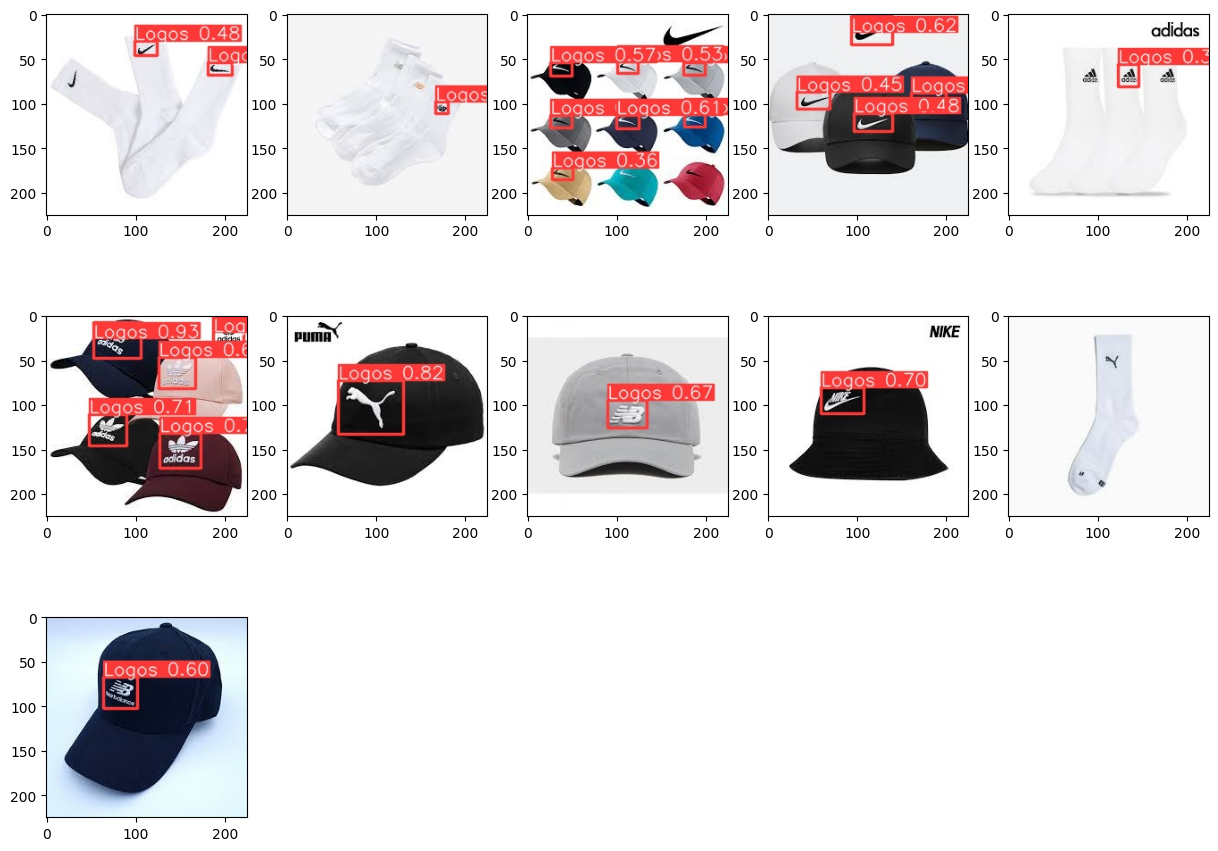

In [28]:
for file_name in os.listdir(f'/content/runs/detect'):
    test_folder = file_name
    break
# test_folder = 'train6'
print(f'test folder : {test_folder}')

fig = plt.figure(figsize=(15, 15))
rows = 3
cols = 5
i = 1

for file_name in os.listdir(f'/content/runs/detect/{test_folder}'):
    if fnmatch.fnmatch(file_name, '*.jpeg*'):
        image = cv2.imread(f'/content/runs/detect/{test_folder}/{file_name}')
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        ax = fig.add_subplot(rows, cols, i)
        ax.imshow(image)
        i += 1
plt.show()

#Crop Inferene Image


image number 1
bbox number 1
bbox number 2
image number 2
bbox number 1
bbox number 2
bbox number 3
bbox number 4
image number 3
bbox number 1
bbox number 2
bbox number 3
bbox number 4
bbox number 5
bbox number 6
bbox number 7
image number 4
bbox number 1
image number 5
bbox number 1
image number 6
bbox number 1
image number 7
bbox number 1
image number 8
bbox number 1
bbox number 2
bbox number 3
bbox number 4
bbox number 5
image number 9
bbox number 1
image number 10
bbox number 1
image number 11


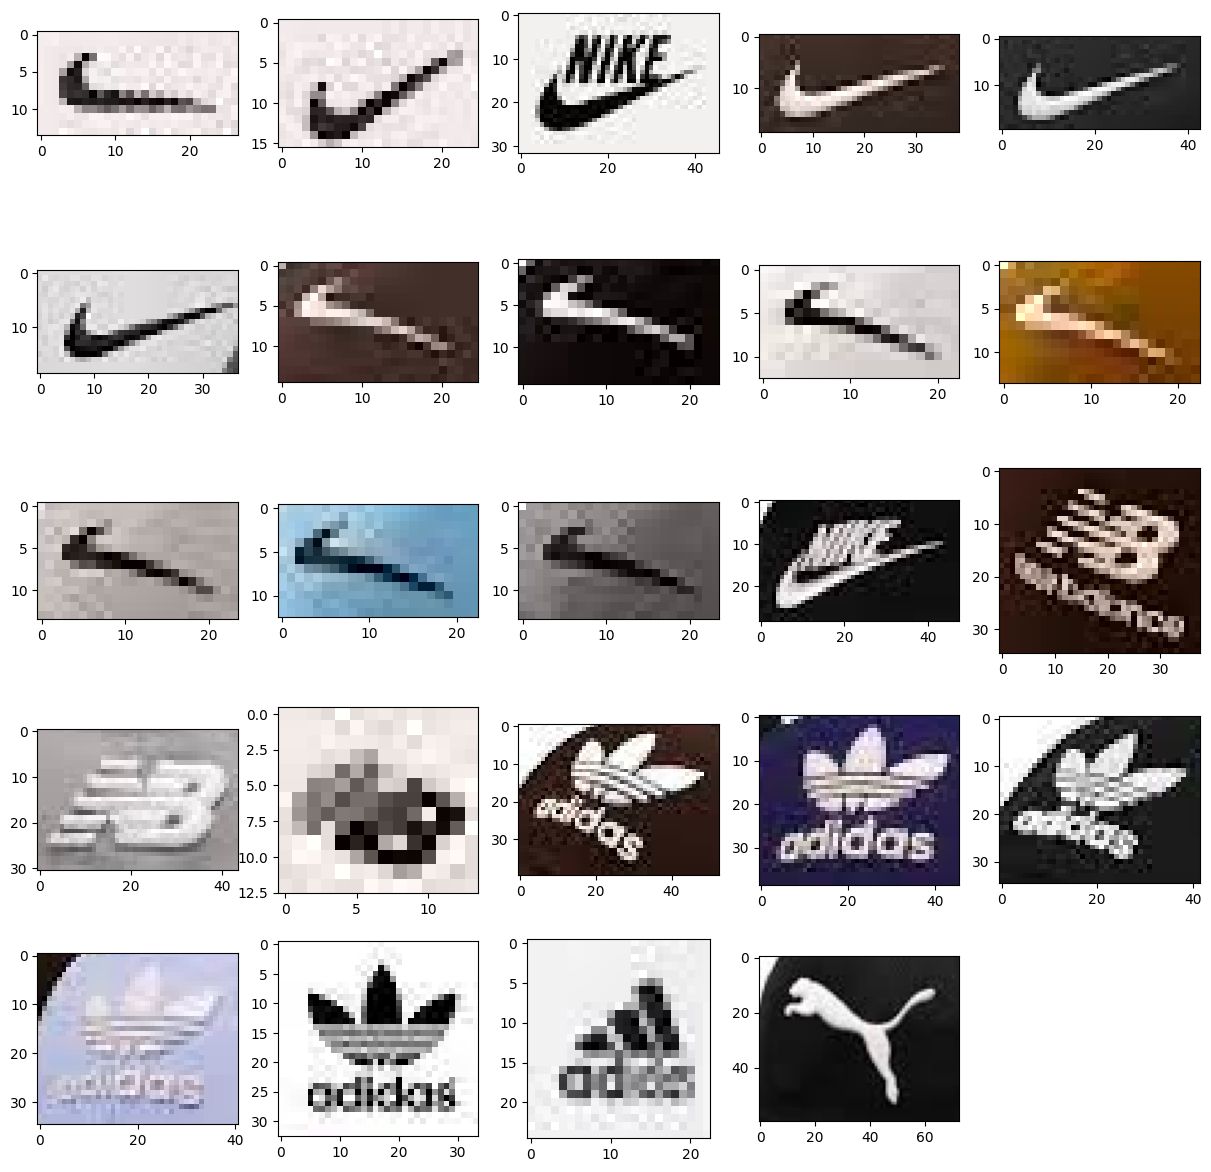

In [72]:
# for image view
fig = plt.figure(figsize=(15, 15))
rows = 5
cols = 5
count = 1

# for image crop
for i, result in enumerate(results): # 모든 이미지 별로 이미지 경로 및 bbox list를 받아온다.
    boxes = result.boxes.cpu().numpy()

    for j, box in enumerate(boxes): # 이미지의 bbox list
        image = result.orig_img
        bbox = box.xyxy[0].astype(int) # bbox 가져오기
        cropped_image = image[bbox[1]:bbox[3], bbox[0]:bbox[2]] # image에서 bbox영역 crop

        ax = fig.add_subplot(rows, cols, count)
        plt.imshow(cropped_image)
        count += 1
        cv2.imwrite(f'cropped/crop_image_{i+1}_{j+1}.jpg', cropped_image)